In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie

# 2D array test

In [5]:
folder_name = '20170705-1'
output_name = '20170706'

In [6]:
vmem = RawCam(path='/mnt/recordings/SimulationResults/%s/' % folder_name, cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)

In [7]:
vmem_temp = VmemMap(vmem)

In [ ]:
vmem.cmap = vmem_temp.cmap

In [ ]:
vmem.saveImage('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/%s/%s' % (output_name, folder_name))

In [ ]:
import subprocess

In [ ]:
subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/movie.mp4"'.format(output_name, folder_name), shell=True)

# batch run

In [431]:
import subprocess
output_name = '20170706'
folder_names = ['20170706-4']

In [432]:
for folder_name in folder_names:
    print(folder_name)
    vmem = RawCam(path='/mnt/recordings/SimulationResults/%s/' % folder_name, cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
    vmem_temp = VmemMap(vmem)
    vmem.cmap = vmem_temp.cmap
    vmem.saveImage('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/%s/%s' % (output_name, folder_name))
    subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/movie.mp4"'.format(output_name, folder_name), shell=True)

20170706-4


# check temperature array

In [350]:
temp  = np.load('/mnt/recordings/SimulationResults/20170706-4/cell_0000/temp.npy')

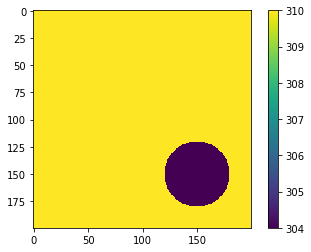

In [351]:
plt.imshow(temp)
plt.colorbar()
plt.show()

# excitabilityの確認

In [429]:
temp  = np.load('/mnt/recordings/SimulationResults/20170706-4/cell_0370/v.npy')

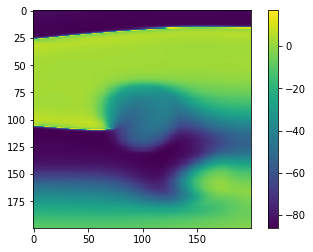

In [430]:
plt.imshow(temp)
plt.colorbar()

In [234]:
vmem = RawCam(path='/mnt/recordings/SimulationResults/20170624-2/', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)

In [1]:
plt.plot(vmem.data[:, 100, 100])
plt.xlim([110,300])

NameError: name 'plt' is not defined

In [242]:
vmem_1D = np.zeros(5400)
for i in range(5400):
    num = '{0:05d}'.format(i+1)
    vmem_1D[i] = np.load('/mnt/recordings/SimulationResults/20170624-1/%s/v.npy' % num)

117.147556737


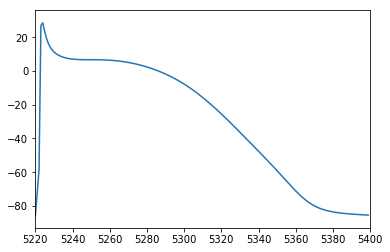

In [249]:
plt.plot(vmem_1D)
plt.xlim([5220, 5400])
print(np.max(vmem_1D)-np.min(vmem_1D))
